# Real-Estate-Client-Target

## Overview

## Business Understanding

## Data Understanding

#### Import Libraries to use

In [1928]:
# Perfom data manipulation and analysis.
import pandas as pd

# Perfoming mathematical calculations.
import numpy as np

# The two libraries below will aid in creating visualizations.
import matplotlib.pyplot as plt 
import seaborn as sns

#### Load Dataset

In [1929]:
df = pd.read_csv("data/adult.csv")
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Observations

The "adult.csv" data loaded above appears to have no column names. Therefore, I will have to come up with names that will be representing each column

In [1930]:
# Create a copy of my dataset.
new_df = df.copy()

In [1931]:
# Identify column names and assign them to a list
columnNames = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss",
            "hours_per_week","native-country","income"]

In [1932]:
# I introduced a parameter as I read my csv file in pandas that will help in naming my dataframe columns.
new_df = pd.read_csv("data/adult.csv", names=columnNames)
new_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis

In [1933]:
# Display the number of rows and columns in the dataset
new_df.shape

(32561, 15)

**Data-types used in my dataset**

Model creation requires numerical data only. I will have to view the information of my dataset to use in this project.

In [1934]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [1935]:
# target feature unique classifier
new_df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

##### Binary Classifier
Here is the binary classification for income column </br>
0 : <=50K </br>
1 : >50K

In [1936]:
# convert our income column to binary classify
new_df['income'] = new_df['income'].str.strip().apply(lambda x: 1 if x == '>50K' else 0)
new_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


From the information of above cell, we can see we have a lot of object data-types that has to be converted to numeric so as to create our model.

**Replacing data**

Identify any irrelevant data and replace it with **nan** value.

In [1937]:
new_df = new_df.replace(" ?", np.nan)

Now we have missing values as shown below, because we replaced irrelevant data with nan values <br/>
The missing values will be handled after we split our data into train and test values to avoid data leakage to our model.

In [1938]:
new_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native-country     583
income               0
dtype: int64

### Exploratory Data Visualization

KEY NOTE: -> income column

    0 : <=50K 
    1 : >50K

The chart below shows the distribution of income based on ages in the dataset.

[]

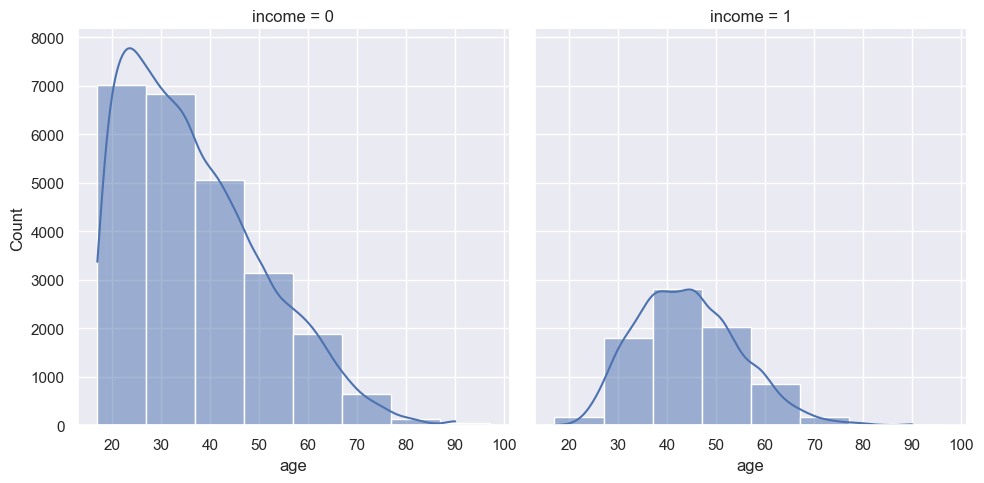

In [1939]:
sns.displot(data=new_df, x="age", binwidth=10, col="income", kde=True)
plt.plot()

Observation above:

From the chart above, I will focus more on the graph positioned on the right side. This is because I am more focused on income 1(>50K) which will help <br/>
the real-estate agency target potential clients.<br/>
The age between 40-50 years tend to be having a promising income(>50K)

#### Gender Feature

In [1940]:
new_df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

Gender is key while identifying potential clients before any approach is initiated.

[]

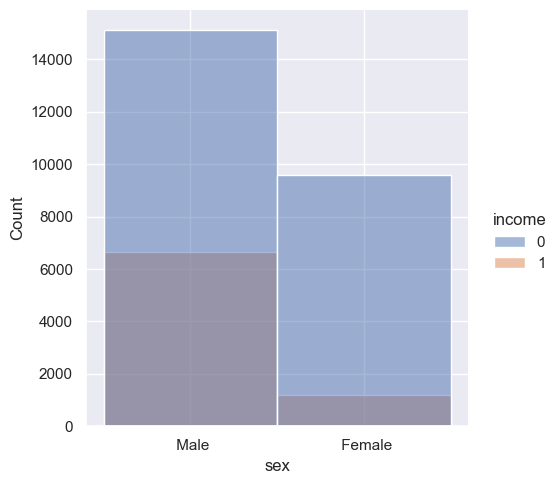

In [1941]:
sns.displot(data=new_df, x="sex", binwidth=10, hue="income")
plt.plot()

Observation above

Male tend to dominate in both income 1(>50K) and income 0(<=50K)

#### Occupation Feature

In [1942]:
new_df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

The chart below compares income earned based on occupation.

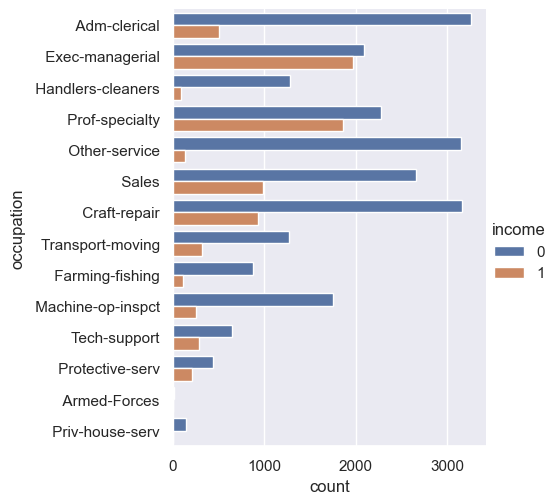

In [1943]:
sns.catplot(data=new_df, y="occupation", kind="count", hue="income")

Below is a chart that displays occupation based on gender and whether their income is <=50K(0) or is >50K(1)

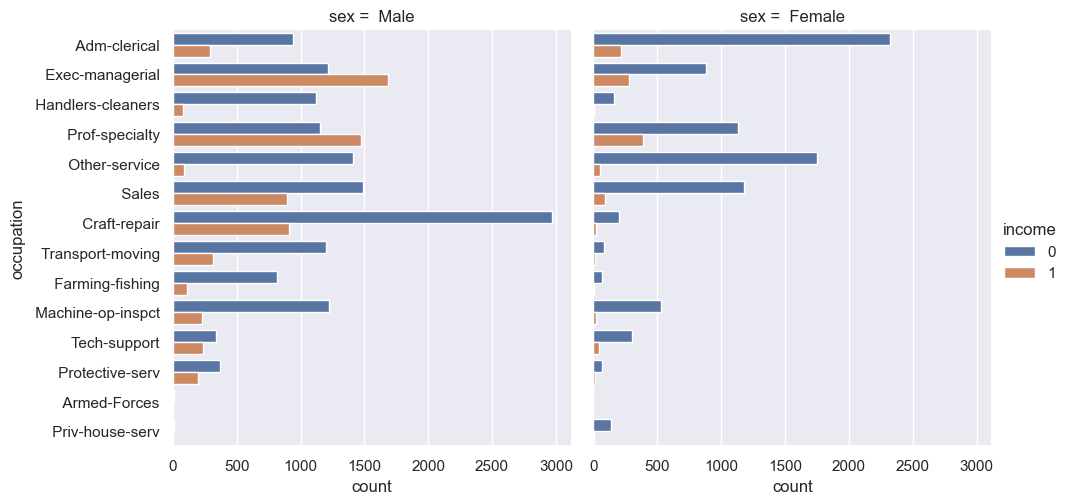

In [1944]:
sns.catplot(data=new_df, y="occupation", kind="count", hue="income", col="sex")

#### Education Feature

In [1945]:
new_df["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

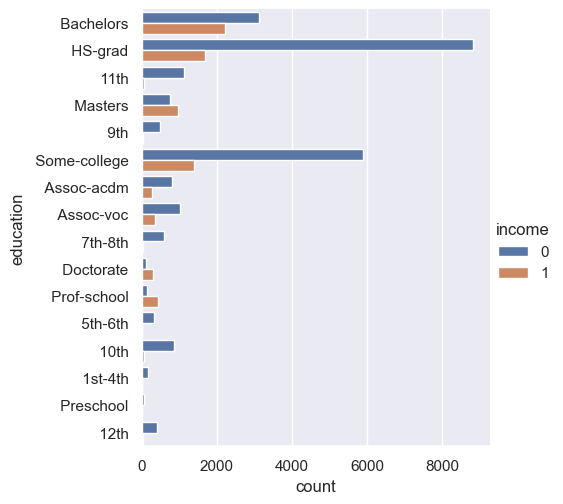

In [1946]:
sns.catplot(data=new_df, y="education", kind="count", hue="income")

## Identify Predictors(X) and Target(y) features

In [1947]:
X = new_df.drop(columns=['income'])
y = new_df['income']

### Predictor Features

In [1948]:
# My predictor features
print("Predictors")
display(X.head())

Predictors


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Drop unnecessary predictor features.
Columns to drop: <br/>
fnlwgt -> data does not give detailed information<br/>
race -> this will promote biasness in disregard to modern society

In [1949]:
X.drop(columns=['fnlwgt', 'race', 'education_num'], inplace=True)

In [1950]:
# View our new predictor data after dropping unnecessary columns
X

,age,workclass,education,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native-country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States


### Target Feature
NOTE:

    0 : <=50K 
    1 : >50K

In [1951]:
# My Target feature
print("Target")
y

Target


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [1952]:
# Find out the unique binary classification of the target values
y.unique()

array([0, 1], dtype=int64)

## Data Preprocessing

#### Perform train_test_split

In [1953]:
# import the module utility to use
from sklearn.model_selection import train_test_split

In [1954]:
# initialize our train_test_split class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Handling missing values in predictors

Identify the null values

In [1955]:
# Idetify the missing values in our training data
X_train.isna().sum()

age                  0
workclass         1210
education            0
marital_status       0
occupation        1217
relationship         0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native-country     392
dtype: int64

In [1956]:
# Idetify the missing values in our test data
X_test.isna().sum()

age                 0
workclass         626
education           0
marital_status      0
occupation        626
relationship        0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native-country    191
dtype: int64

#### Impute
Missing value imputation.

In [1957]:
# import simple imputer
from sklearn.impute import SimpleImputer

The missing values will be imputed by the most frequent because the columns are categorecal.

In [1958]:
# Create copies of your train and test data
X_train_final = X_train.copy()
X_test_final = X_test.copy()

In [1959]:
X_train_final.head()

,age,workclass,education,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native-country
27585,51,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,50,United-States
18010,46,NaN,HS-grad,Married-spouse-absent,NaN,Not-in-family,Male,0,0,40,Philippines
22472,25,Private,Bachelors,Never-married,Prof-specialty,Own-child,Female,0,0,55,United-States
4585,27,Private,Assoc-acdm,Never-married,Other-service,Not-in-family,Male,0,0,40,United-States
11191,47,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,Male,7688,0,45,United-States


In [1960]:
imp_freq = SimpleImputer(strategy="most_frequent")

# For the train data I perform both the fit and transform method
X_train_imputed = imp_freq.fit_transform(X_train_final)

# For the test data I perform only the transform method
X_test_imputed = imp_freq.transform(X_test_final)

Below, Convert the imputed data back into dataframes, keeping original column names

In [1961]:
X_train_final_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_final_df = pd.DataFrame(X_test_imputed, columns=X_train.columns)

Check whether the missing values were handled

In [1962]:
X_train_final_df.isna().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native-country    0
dtype: int64

In [1963]:
X_test_final_df.isna().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native-country    0
dtype: int64

#### Convert object dtype to numeric format
OneHotEncoder will assist here

In [1964]:
# import relevant class
from sklearn.preprocessing import OneHotEncoder

In [1965]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit on the training data
X_train_encoded = encoder.fit_transform(X_train_final_df)

# Transform the test data
X_test_encoded = encoder.transform(X_test_final_df)

# Convert the encoded arrays back to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, index=(X_train_final_df.index), columns=encoder.get_feature_names(X_train_final_df.columns) )
X_test_encoded = pd.DataFrame(X_test_encoded, index=(X_test_final_df.index), columns=encoder.get_feature_names(X_train_final_df.columns))


# pd.DataFrame(ohe.fit_transform(X_train_cat), index=X_train.index)

In [1966]:
X_train_encoded

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21812,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1969]:
X_test_encoded

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10741,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Generate descriptive statistics below

In [1970]:
X_test_encoded.describe()

,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,...,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000
mean,0.011353,0.017960,0.022613,0.021496,0.021031,0.024288,0.026242,0.023544,0.027266,0.024474,...,0.000931,0.002978,0.000651,0.001954,0.001768,0.000744,0.000465,0.918295,0.001303,0.000558
std,0.105949,0.132813,0.148673,0.145039,0.143495,0.153949,0.159863,0.151629,0.162865,0.154523,...,0.030493,0.054491,0.025516,0.044165,0.042014,0.027276,0.021567,0.273927,0.036073,0.023624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


observation above <br/>
The encoded data falls between a scale of 0 to 1, which is good fo modelling

## Modelling

## Conclusion